In [1]:
# Importing numpy and math
import numpy as np 
import math
import matplotlib.pyplot as plt

In [2]:
def generate_A(mean,scale,size):
  return np.random.normal(mean,scale,size) # getting an random matrix from gausian distribution

def generate_B(mean,scale,size):
  A=generate_A(mean,scale,size)
  B=A+A.T # creating B according to given question
  return B

question2 part 1

In [3]:
def eigen_values_vectors(B):
    egnval,egnV=np.linalg.eigh(B) # getting eigen values in egnval in acending order we have to make it decending with accordance with egnV
    egnval=np.flip(egnval)
    egnV=np.flip(egnV,axis=1)
    return egnval ,egnV 

def EVD(egnval,egnV):
    return np.diag(egnval), egnV
size=(100,100)
mean=0
sigma=math.sqrt(float(input("enter varience : ")))

B=generate_B(mean,sigma,size)
egnval , egnV = eigen_values_vectors(B)
digonalvector,eigenvectormatrix=EVD(egnval,egnV)
print(digonalvector,eigenvectormatrix)
Breconstructed=eigenvectormatrix @ digonalvector @ eigenvectormatrix.T
print(np.allclose(Breconstructed,B))

[[ 26.99558855   0.           0.         ...   0.           0.
    0.        ]
 [  0.          24.85070607   0.         ...   0.           0.
    0.        ]
 [  0.           0.          24.65118333 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... -24.99685905   0.
    0.        ]
 [  0.           0.           0.         ...   0.         -26.20349051
    0.        ]
 [  0.           0.           0.         ...   0.           0.
  -26.80117629]] [[ 0.03443801 -0.0367673   0.13558938 ... -0.02497007  0.1145152
  -0.24857031]
 [ 0.09996442  0.00362049 -0.10045152 ...  0.0315383   0.06866323
   0.1536942 ]
 [ 0.02738961  0.1587191  -0.01023328 ...  0.00996409  0.02021696
   0.09901803]
 ...
 [-0.04547607  0.04979972 -0.15174617 ...  0.06672973 -0.02432882
  -0.0649062 ]
 [ 0.09704888 -0.21086753  0.08068619 ... -0.10152144  0.0334958
  -0.06485205]
 [-0.01065637 -0.06400521 -0.04141501 ... -0.03716705 -0.02351031
  -0.02809376]]
True


question 2 part 2

In [4]:
def B_B_k_norm(B,k):
    egnval,egnV=eigen_values_vectors(B)
    B_k=np.zeros(B.shape)
    for i in range(k):
        v_i=np.expand_dims(egnV[:,i],axis=1)
        B_k+=egnval[i]*( v_i @ v_i.T )
    return float(np.linalg.norm(B-B_k,'fro'))
sigma=math.sqrt(float(input("enter varience : ")))
B=generate_B(mean,sigma,size)
k=int(input("enter value of K : "))
print(B_B_k_norm(B,k))

132.0862984842193


question 2 part 3

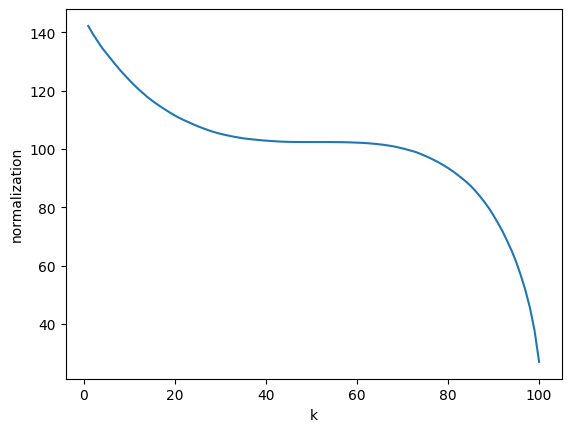

In [5]:
sigma=math.sqrt(float(input("enter varience : ")))
B=generate_B(mean,sigma,size)
For=[]
K=[]
for i in range(100):   
    K.append(i+1)
    For.append(B_B_k_norm(B,i))
plt.plot(K,For)    
plt.xlabel("k")
plt.ylabel("normalization")
plt.show()

question 2 part 4

In [ ]:
def VTV_I(egnV):
    I=np.identity(egnV.shape[1])
    return float(np.linalg.norm(egnV.T @ egnV - I,'fro'))

sigma=math.sqrt(float(input("enter varience : ")))
B=generate_B(mean,sigma,size)
egnval,egnV=eigen_values_vectors(B)
VTV_I_norm=VTV_I(egnV)
print(VTV_I_norm)


queston 2 part 5


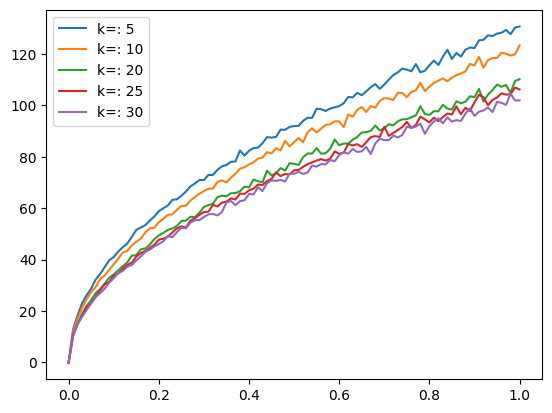

In [ ]:
def plot_data_for_B(k,size,mean):
    bbknorm=[]
    for i in range(101):
        sigma=math.sqrt(i*0.01)
        B=generate_B(mean,sigma,size)
        bbknorm.append(B_B_k_norm(B,k))
    return bbknorm

k=[5, 10, 20, 25, 30]
size=(100,100)
BigB=[]
varience=[]
for i in range(101):
    varience.append(i*0.01)
for i in k:
    BigB.append(plot_data_for_B(i,size,mean))
for i in range(5):
    plt.plot(varience,BigB[i],label=f"k=: {k[i]}")

plt.legend()
plt.show()